In [23]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from src.PLS.utils import sims_graphs
from matplotlib.lines import Line2D

In [24]:
Typ = ["simple", "simple_I0", "meta"][1]
siz = ["10", "100", "1000"][0]
factor = 1000/int(siz)
seed = 1912
sim_scen = ["", "c1", "c2", "c3"][0]
beta_controls = np.arange(0, 1.1, 0.1)
gamma_additives = np.arange(0, 10, 1)
thinning_intensities = np.arange(0, 0.55, 0.05)
thinning_frequencies = np.arange(0.5, 3.0, 0.5)
n_runs = 200

In [25]:
#import distributions
distro = np.genfromtxt(f"../../../../Data/R0_3/Sims_SIR/Sampled_distros/Distro_{Typ}_{siz}.csv", delimiter=",")[0:n_runs]
#distro = [np.genfromtxt("C:\\Users\\ollie\\PycharmProjects\\PLS Research\\Data\\R0_5\\Fitted\\MLE_meta_b.csv", delimiter=",")]*n_runs
#distro = [np.genfromtxt("C:\\Users\\ollie\\PycharmProjects\\PLS Research\\Data\\R0_3\\Fitted\\MLE_b_I0_1_3.csv", delimiter=",")[0]]*n_runs
#distro = [np.genfromtxt("C:\\Users\\ollie\\PycharmProjects\\PLS Research\\Data\\R0_3\\Fitted\\MLE_b_3.csv", delimiter=",")[0]]*n_runs
#distro = [3]*n_runs

In [26]:
print(distro)

[2.89540174 4.16046134 3.04697033 3.2430365  2.65848828 1.88558015
 3.34718637 1.83614121 4.79937315 4.96835783 4.09497723 1.96282177
 2.00687895 2.02816774 3.87430861 2.45438734 3.77449996 1.62338258
 1.06213308 4.29245726 1.86718984 1.49754638 2.28582581 1.87225039
 2.73743586 2.03216715 2.30527635 3.29913665 3.19351848 2.26673086
 4.03873088 3.8969973  1.32409771 2.1070668  1.94753955 3.85911651
 2.83733149 7.23537394 1.14006003 3.28608185 5.14365785 1.64702886
 1.83663116 3.42792328 2.0604886  2.49146055 2.75908572 3.17297329
 1.70530002 4.35204896 3.82857406 2.0262034  3.12826182 1.75896493
 2.32470578 3.4727216  1.7284641  3.79936793 2.13606779 2.3685814
 3.12489652 1.24170729 2.08395934 1.96963898 2.27713704 2.07082365
 2.51159606 1.96105446 4.01596918 2.60155961 2.06907855 2.33081101
 2.30925877 5.22829866 2.01069964 1.88634161 5.34187421 1.63810766
 3.0213352  2.25069082 7.70959998 3.16476365 2.22394153 4.80213404
 2.98056039 1.72944602 2.67026296 3.15408688 4.51227622 2.78509

In [27]:
#for i in range(len(beta_controls)):
output_dictionary = sims_graphs(distro, Typ, siz, seed, sim_scen, beta_controls[:],ext=True)
plot_dict = {}
plot_dict["Runs"] = []
plot_dict["T"] = []
for i in range(0, 1):
    plot_dict["Runs"].append(np.mean(np.array([j for j in output_dictionary["Runs"][i:i + n_runs]]), axis=0))
    plot_dict["T"].append(np.mean(output_dictionary["T"][i:i + n_runs]))

In [28]:
print(plot_dict)

{'Runs': [array([[9.   , 1.   , 0.   ],
       [7.875, 2.05 , 0.075],
       [7.74 , 2.125, 0.135],
       ...,
       [3.   , 0.   , 7.   ],
       [3.   , 0.   , 7.   ],
       [3.   , 0.   , 7.   ]])], 'T': [3.1257921371787645]}


In [29]:
if Typ == "meta":

    import numpy as np
    from src.PLS.metaSIR import meta_no_ext_sir
    from src.PLS.metaSIR import meta_timed_sir
    from decimal import Decimal, ROUND_UP
    from src.PLS.utils import basic_kernel
    from src.PLS.utils import basic_square_map
    from src.PLS.utils import straight_line_distances
    from src.PLS.ODE_tools import run_meta_model

    #ODEs
    N = 4
    tim = np.arange(0, 20 + 0.2, 0.2)
    test_map = basic_square_map(N)
    test_distances = straight_line_distances(test_map, N, scaling=10)
    y0 = [999, 1, 0, 1000, 0, 0, 1000, 0, 0, 1000, 0, 0]
    meta_out = run_meta_model(5 / 1000, 1, y0, 20, False, basic_kernel, test_distances).y

    #Reality
    distance_measure_array = ["sum_sq", "sum_sqrt_sq", "mixed", "rinf", "meta"]
    dis = distance_measure_array[-1]
    seed = 1
    N = 4
    test_map = basic_square_map(N)
    test_distances = straight_line_distances(test_map, N, scaling=10)
    R0 = 5
    gamma = 1
    X0 = [[999, 1, 0]]
    div = sum(X0[0])
    for i in range(N - 1):
        X0.append([1000, 0, 0])
    beta = R0 / div
    rng = np.random.default_rng(seed)
    tstep = 0.01
    tmax = 100
    tmax = float(Decimal(tstep) * (
                Decimal(meta_timed_sir(X0, beta, gamma, N, test_distances, basic_kernel, tmax, tstep, rng)) / Decimal(
            tstep)).quantize(1, rounding=ROUND_UP))
    rng = np.random.default_rng(seed)
    reality_3 = meta_no_ext_sir(X0, beta, gamma, N, test_distances, basic_kernel, tmax, tstep, rng)

In [30]:
if Typ == "meta":
    fig, ax0 = plt.subplots(figsize = (18,12),nrows=2, ncols=2)
    for i in range(0,2):

        times = np.arange(0,max(plot_dict["T"]),0.01)
        run_times = np.arange(0,tmax,tstep)
        counter = -1
        font = {'size': 15}
        # using rc function
        plt.rc('font', **font)
        for i in range(0,2):
            for j in range(0,2):
                counter +=1
                ax0[i,j].plot(run_times, np.array(reality_3[:,counter]/factor), linestyle = "--")
                ax0[i,j].plot(times,np.array(plot_dict["Runs"][0][:,counter])[0:len(times),1], color = "orange", alpha = 1)
                ax0[i,j].plot(times,np.array(plot_dict["Runs"][0][:,counter])[0:len(times),0], color = "b", alpha = 1)
                ax0[i,j].plot(times,np.array(plot_dict["Runs"][0][:,counter])[0:len(times),2], color = "g", alpha = 1)
                #sns.lineplot(x=tim,y=meta_out[0+(counter)*3],ax=ax0[i,j],linestyle = "-.", color="blue")
                #sns.lineplot(x=tim,y=meta_out[1+counter*3],ax=ax0[i,j],linestyle = "-.", color="orange")
                #sns.lineplot(x=tim,y=meta_out[2+counter*3],ax=ax0[i,j],linestyle = "-.",color="green")
                ax0[i,j].set_xlabel("Time")
                ax0[i,j].set_ylabel("Hosts in Compartment")
                ax0[i,j].set_title(f"Node {counter+1}")
                ax0[i,j].set_xlim(0,10)
        legend_elements = [Line2D([0], [0], color='g', lw=4, label='R'),
                       Line2D([0], [0], color='orange',lw=4, label='I'),
                           Line2D([0], [0], color='deepskyblue', lw=4, label='S'),
                       Line2D([0], [0], color='black',lw=4, label='Average of 200 Sims'),
                       Line2D([0], [0], color='black',linestyle="--",lw=4, label='Reality')]
        fig.suptitle(f"{['Sampled Distribution','MLE point estimate'][1]}")
        fig.legend(handles=legend_elements, bbox_to_anchor = (0.90,0.8))
        fig.show()

In [31]:
if Typ == "meta":
    fig,ax0 = plt.subplots(figsize=(10,10) ,nrows=2,ncols=2)
    ax0 = ax0.flatten()
    for i in range(0,4):
        ax0[i].plot(run_times,reality_3[:,i])
        sns.lineplot(x=tim,y=meta_out[0+i*3],ax=ax0[i],linestyle = "--", color="blue")
        sns.lineplot(x=tim,y=meta_out[1+i*3],ax=ax0[i],linestyle = "--", color="orange")
        sns.lineplot(x=tim,y=meta_out[2+i*3],ax=ax0[i],linestyle = "--",color="green")
        ax0[i].set_xlim(0,tmax)

    fig.show()

In [32]:
if Typ != "meta":

    import numpy as np
    from src.PLS.metaSIR import meta_no_ext_sir
    from src.PLS.metaSIR import meta_timed_sir
    from decimal import Decimal, ROUND_UP
    from src.PLS.utils import basic_kernel
    from src.PLS.utils import basic_square_map
    from src.PLS.utils import straight_line_distances
    from src.PLS.ODE_tools import run_meta_model

    #ODEs
    N = 4
    tim = np.arange(0, 20 + 0.2, 0.2)
    test_map = basic_square_map(N)
    test_distances = straight_line_distances(test_map, N, scaling=10)
    y0 = [999, 1, 0, 1000, 0, 0, 1000, 0, 0, 1000, 0, 0]
    meta_out = run_meta_model(5 / 1000, 1, y0, 20, False, basic_kernel, test_distances).y

    #Reality
    import numpy as np
    from src.PLS.baseSIR import no_ext_sir
    from src.PLS.baseSIR import real_sir
    from src.PLS.baseSIR import real_sir_times
    from src.PLS.baseSIR import timed_sir
    from decimal import Decimal, ROUND_UP
    import time
    from src.PLS.ABC import ABC_core
    from src.PLS.ABC import sum_sqrt_sq_distance
    import os

    distance_measure_array = ["sum_sq","sum_sqrt_sq","mixed","rinf"]
    dis = distance_measure_array[1]
    if Typ == "simple":
        I0 = ["","_I1"][0]
    elif Typ == "simple_I0":
        I0 = ["","_I1"][1]

    seed = 1

    if I0 == "":
        X0 = [900, 100, 0]
    elif I0 == "_I1":
        X0 = [999,1,0]

    gamma = 1
    beta = 3
    mu = 0
    tstep = 0.05
    test_time = 100
    rng = np.random.default_rng(seed)
    tmax = float(Decimal(tstep) * (Decimal(timed_sir(X0, mu, beta, gamma, test_time, rng) )/ Decimal(tstep)).quantize(1,rounding=ROUND_UP))
    rng = np.random.default_rng(seed)
    start_time = time.time()
    reality_1 = no_ext_sir(X0, mu, beta, gamma, tmax, tstep, rng)
    print(f"Reality took {time.time() - start_time} seconds to run!")

Reality took 0.04590296745300293 seconds to run!


C:\Users\ollie\AppData\Local\Temp\ipykernel_28184\1780312216.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


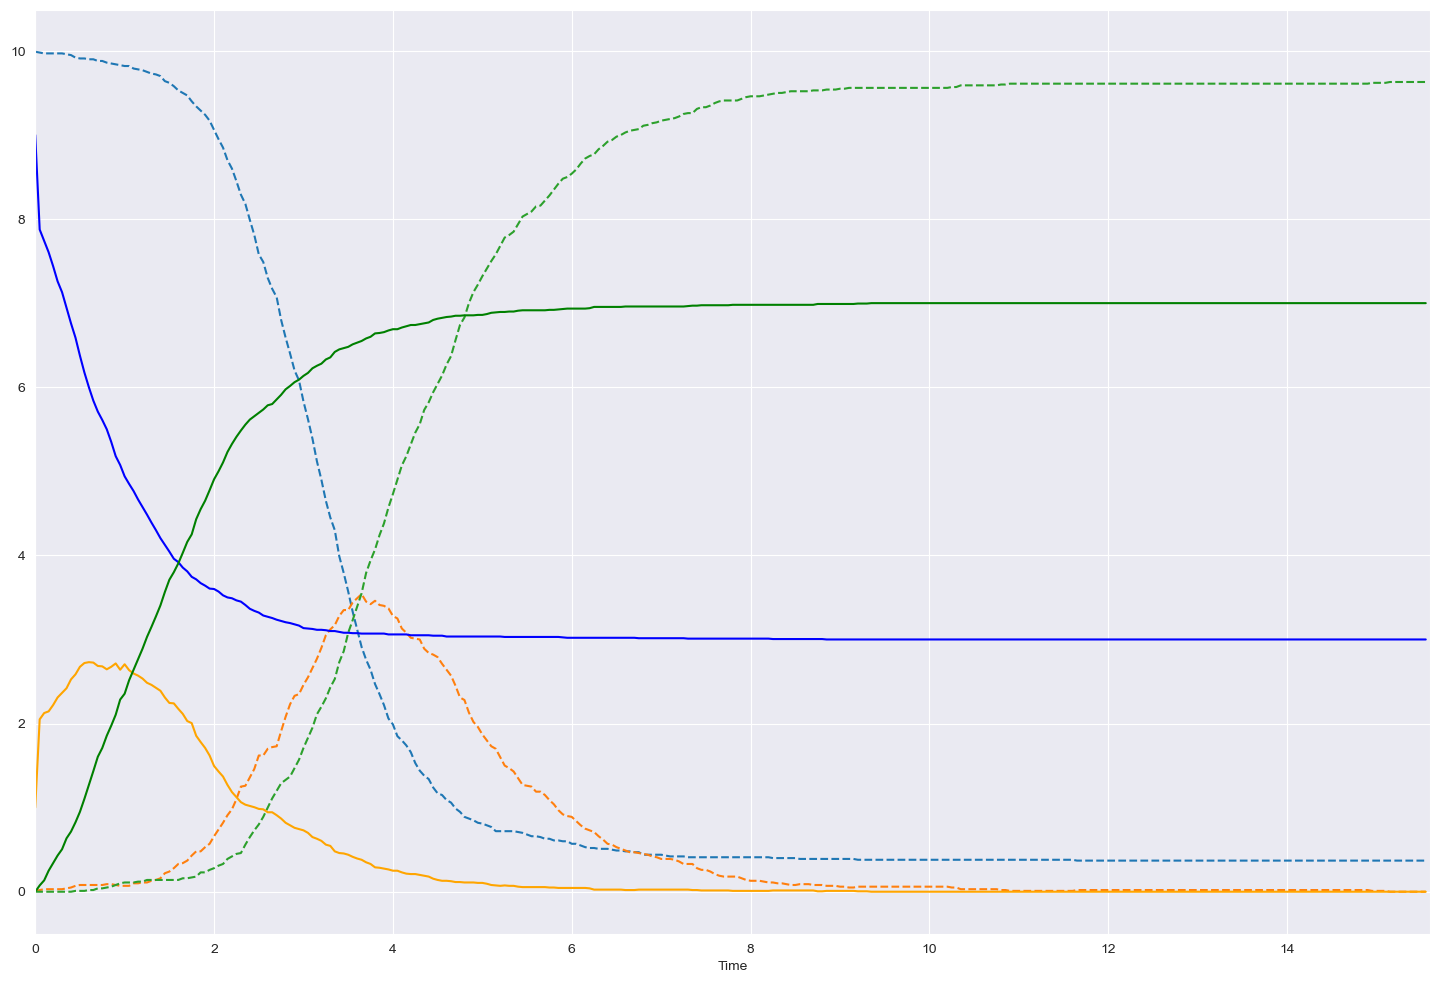

In [33]:
if Typ != "meta":
    fig, ax0 = plt.subplots(figsize = (18,12))
    times = np.arange(0,tmax,0.05)
    run_times = np.arange(0,tmax,tstep)
    ax0.plot(run_times, np.array(reality_1)/factor, linestyle = "--")
    ax0.plot(times,np.array(plot_dict["Runs"][0])[0:len(times),1], color = "orange", alpha = 1)
    ax0.plot(times,np.array(plot_dict["Runs"][0])[0:len(times),0], color = "b", alpha = 1)
    ax0.plot(times,np.array(plot_dict["Runs"][0])[0:len(times),2], color = "g", alpha = 1)
    ax0.set_xlabel("Time")
    ax0.set_xlim(0,tmax)
    fig.show()